In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data = pd.read_csv(r"E:\PythonCore\datafiles\mnist_train.csv", header=None)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 119.8 MB


In [3]:
test_data = pd.read_csv(r"E:\PythonCore\datafiles\mnist_test.csv", header=None)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


In [4]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


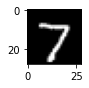

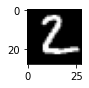

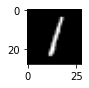

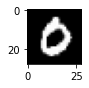

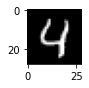

In [15]:
for i in range(5):
    plt.figure(figsize=(1,1))
    plt.imshow(test_data.iloc[i,1:].values.reshape(28,28), cmap='gray')
    plt.show()

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


In [29]:
X = train_data.iloc[:,1:].values/255
# normalizing image between 0 to 1
y = train_data.iloc[:,0]
print(X.shape, y.shape)

(20000, 784) (20000,)


In [66]:
model = Sequential()
model.add(Dense(40, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
# When you use softmax in your output layer you will use loss function
# sparse_categorical_crossentropy
model.fit(X,y,batch_size=100, epochs=25)

Epoch 1/25
200/200 [==============================] - 0s 2ms/step - loss: 0.7366
Epoch 2/25
200/200 [==============================] - 1s 3ms/step - loss: 0.3078
Epoch 3/25
200/200 [==============================] - 1s 3ms/step - loss: 0.2504
Epoch 4/25
200/200 [==============================] - 1s 3ms/step - loss: 0.2196
Epoch 5/25
200/200 [==============================] - 0s 2ms/step - loss: 0.1943
Epoch 6/25
200/200 [==============================] - 0s 2ms/step - loss: 0.1761
Epoch 7/25
200/200 [==============================] - 0s 2ms/step - loss: 0.1585
Epoch 8/25
200/200 [==============================] - 0s 2ms/step - loss: 0.1444
Epoch 9/25
200/200 [==============================] - 0s 2ms/step - loss: 0.1320
Epoch 10/25
200/200 [==============================] - 1s 3ms/step - loss: 0.1204
Epoch 11/25
200/200 [==============================] - 0s 2ms/step - loss: 0.1120
Epoch 12/25
200/200 [==============================] - 1s 3ms/step - loss: 0.1027
Epoch 13/25
200/200 [====

In [67]:
X_test = test_data.iloc[:,1:].values/255
# normalizing image between 0 to 1
y_test = test_data.iloc[:,0]
print(X_test.shape, y_test.shape)

(10000, 784) (10000,)


In [68]:
yhat = model.predict(X_test)
yhat.shape

(10000, 10)

In [69]:
np.set_printoptions(suppress=True)

In [70]:
yhat[0]

array([0.00000583, 0.        , 0.00002002, 0.00002715, 0.        ,
       0.00000225, 0.        , 0.99994373, 0.00000064, 0.00000038],
      dtype=float32)

In [71]:
# rowwise maximum
y_ans = yhat.argmax(axis=1)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [73]:
print(classification_report(y_test, y_ans))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.96      0.95      1032
           3       0.94      0.94      0.94      1010
           4       0.96      0.95      0.95       982
           5       0.95      0.96      0.96       892
           6       0.95      0.96      0.96       958
           7       0.97      0.95      0.96      1028
           8       0.96      0.92      0.94       974
           9       0.94      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

